In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [30]:
data_baseline = "/home/gianniif/ecommerce-predictor/data_baseline/"

In [35]:
batch_size = 16
img_height = 32
img_width = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_baseline,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_baseline,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names


Found 50030 files belonging to 213 classes.
Using 40024 files for training.
Found 50030 files belonging to 213 classes.
Using 10006 files for validation.


Exception ignored in: <bound method IteratorResourceDeleter.__del__ of <tensorflow.python.data.ops.iterator_ops.IteratorResourceDeleter object at 0x7f40803400c8>>
Traceback (most recent call last):
  File "/home/gianniif/.local/lib/python3.6/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    class IteratorBase(collections.Iterator, trackable.Trackable,
  File "/home/gianniif/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    
KeyboardInterrupt: 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[254.82422  254.82422  254.82422 ]
   [253.3125   253.3125   253.3125  ]
   [254.26172  254.26172  254.26172 ]
   ...
   [254.4375   254.4375   254.4375  ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.    

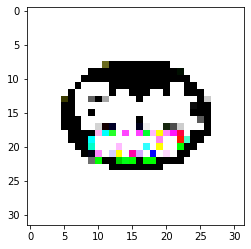

In [44]:
import matplotlib.pyplot as plt


for x,y  in train_ds:
    print(x)
    print(y)
    
    plt.imshow(x[10])
    break

In [36]:
num_classes = len(class_names)

input_l = layers.Input(shape=(img_height, img_width, 3))

x = layers.Rescaling(1./255)(input_l)
x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

output_l = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=input_l, outputs=output_l)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          1849

In [37]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
epochs=50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model_5/conv2d_15/Relu (defined at <ipython-input-38-b7f95468abe8>:5) ]] [Op:__inference_train_function_5491]

Function call stack:
train_function
